<a href="https://colab.research.google.com/github/karthikeyan0726/2348524_dl-lab/blob/main/2348524_DL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras


In [ ]:
# 2.Load the dataset
df=pd.read_csv('/content/creditcard.csv')

DATA PREPROCESSING

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132779,80109,1.310383,0.148796,-0.106156,0.245652,0.376795,0.276660,-0.048826,0.027499,0.151769,...,-0.321307,-0.897167,-0.008168,-1.336089,0.327048,0.211107,-0.015559,0.001677,4.49,0.0
132780,80109,1.187695,0.161777,-0.102921,0.367072,0.000082,-0.725995,0.370336,-0.169480,-0.441230,...,-0.329042,-1.104087,0.058738,0.007578,0.288024,0.136426,-0.075150,0.003084,45.95,0.0
132781,80109,1.210400,-0.061808,0.934410,1.149472,-0.586856,0.269742,-0.582677,0.148328,0.963741,...,-0.118127,-0.134792,-0.107835,-0.459923,0.522964,-0.356392,0.070720,0.029614,9.99,0.0
132782,80110,-0.357977,-0.288527,1.506609,-2.484692,-1.031518,-0.910416,-0.259715,0.024064,-2.413570,...,-0.077703,0.151033,-0.004620,0.481458,-0.370021,-0.439370,0.380669,0.203272,15.00,0.0
132783,80110,-1.824050,0.750460,1.120322,1.158644,-0.184192,-0.196253,-0.008336,0.202622,-0.182532,...,-0.156936,-0.392619,-0.116801,-0.058439,0.238796,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,...,132784.000000,132784.000000,132784.000000,132784.000000,132784.000000,132783.000000,132783.000000,132783.000000,132783.000000,132783.000000
mean,50235.524581,-0.244860,0.002637,0.677243,0.141818,-0.285513,0.079162,-0.117917,0.062417,-0.085080,...,-0.037759,-0.115958,-0.034281,0.012424,0.131027,0.022938,0.000950,0.002424,92.200265,0.001973
std,20198.729625,1.823137,1.621493,1.274184,1.328062,1.315753,1.285315,1.172618,1.208628,1.094425,...,0.719933,0.635717,0.601327,0.594514,0.438204,0.492423,0.390784,0.310872,250.199971,0.044376
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,37127.000000,-1.016455,-0.573371,0.173648,-0.717461,-0.908689,-0.660498,-0.605836,-0.132220,-0.713788,...,-0.225642,-0.544815,-0.172561,-0.323385,-0.134965,-0.326321,-0.060140,-0.004082,6.085000,0.000000
50%,52028.500000,-0.258119,0.094241,0.753104,0.167537,-0.318044,-0.174817,-0.066735,0.079190,-0.149154,...,-0.058520,-0.092197,-0.045627,0.068930,0.168569,-0.067111,0.011751,0.023597,24.320000,0.000000
75%,67190.000000,1.158425,0.763325,1.367501,0.998507,0.236329,0.465882,0.408836,0.370311,0.496916,...,0.114636,0.303344,0.082637,0.408652,0.419724,0.288427,0.086667,0.077093,82.070000,0.000000
max,80110.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.shape

(132784, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.fillna(0,inplace=True)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the numerical features to be scaled
numerical_features = ['Time','Amount']

# Fit and transform the scaler on the training data
df[numerical_features] = scaler.fit_transform(df[numerical_features])





There is no categorical values are in the data set so no need to perform encoding

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your preprocessed DataFrame with features and target variable
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the dataset into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = X_train.shape[1]  # Number of features in the input data


# Training the model with different optimization algorithms and learning rates
# 1: RMSprop optimizer with a different learning rate
model_rmsprop = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 2: Adam optimizer with a different learning rate
model_adam = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3320/3320 [==============================] - 12s 3ms/step - loss: 0.0087 - accuracy: 0.9989 - val_loss: 0.0077 - val_accuracy: 0.9989
Epoch 2/10
3320/3320 [==============================] - 8s 3ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0080 - val_accuracy: 0.9989
Epoch 3/10
3320/3320 [==============================] - 7s 2ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0077 - val_accuracy: 0.9988
Epoch 4/10
3320/3320 [==============================] - 8s 2ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0079 - val_accuracy: 0.9989
Epoch 5/10
3320/3320 [==============================] - 7s 2ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0081 - val_accuracy: 0.9989
Epoch 6/10
3320/3320 [==============================] - 8s 2ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0072 - val_accuracy: 0.9989
Epoch 7/10
3320/3320 [==============================] - 7s 2ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0076 - val_accuracy

In [ ]:
from sklearn import metrics
# Predict the labels for the test set of rmsprop
y_pred_rms = model_rmsprop.predict(X_test)
# Predict the labels for the test set of adam
y_pred_adam = model_adam.predict(X_test)

# Convert predicted probabilities to class predictions
class_predictions_r = (y_pred_rms > 0.5).astype(int)
class_predictions_a = (y_pred_adam > 0.5).astype(int)

# Now use class_predictions for evaluating the metrics of rmsprop
accuracy1 = metrics.accuracy_score(y_test, class_predictions_r)
precision1, recall1, f1_score1, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_r, average='binary')
roc_auc1= metrics.roc_auc_score(y_test, class_predictions_r)

# Now use class_predictions for evaluating the metrics of adam
accuracy2 = metrics.accuracy_score(y_test, class_predictions_a)
precision2, recall2, f1_score2, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_a, average='binary')
roc_auc2 = metrics.roc_auc_score(y_test, class_predictions_a)


830/830 [==============================] - 1s 1ms/step


[0.9988703543321912, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.872598315702752]
[0.9990209737545657, 0.7894736842105263, 0.7627118644067796, 0.7758620689655172, 0.8811295000198288]
Evaluation metrics of model with RMS prop optimizer


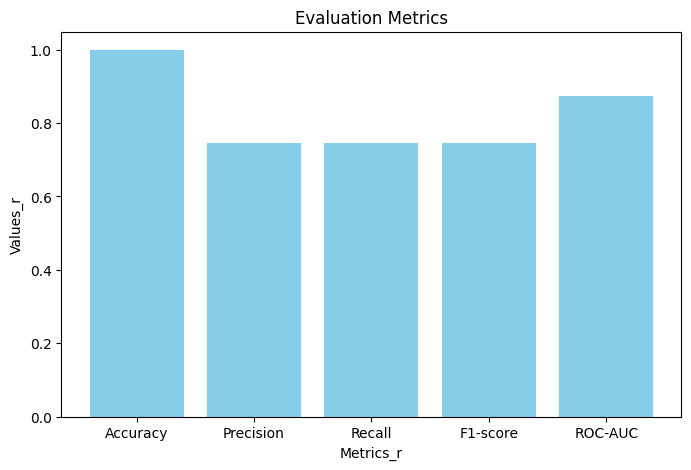

Evaluation metrics of model with adam optimizer


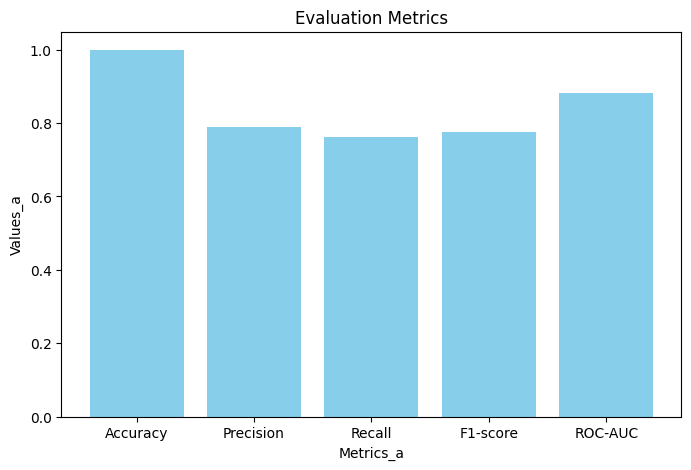

In [ ]:
# Create a bar plot to visualize the evaluation metrics
import matplotlib.pyplot as plt

# Define the evaluation metrics and their respective values
metrics_r= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_r = [accuracy1, precision1, recall1, f1_score1, roc_auc1]
print(values_r)

# Define the evaluation metrics and their respective values
metrics_a= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_a = [accuracy2, precision2, recall2, f1_score2, roc_auc2]
print(values_a)
print("Evaluation metrics of model with RMS prop optimizer")
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_r, values_r, color='skyblue')
plt.xlabel('Metrics_r')
plt.ylabel('Values_r')
plt.title('Evaluation Metrics')
plt.show()

print("Evaluation metrics of model with adam optimizer")
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_a, values_a, color='skyblue')
plt.xlabel('Metrics_a')
plt.ylabel('Values_a')
plt.title('Evaluation Metrics')
plt.show()


confusion metrics of model with rms optimizer


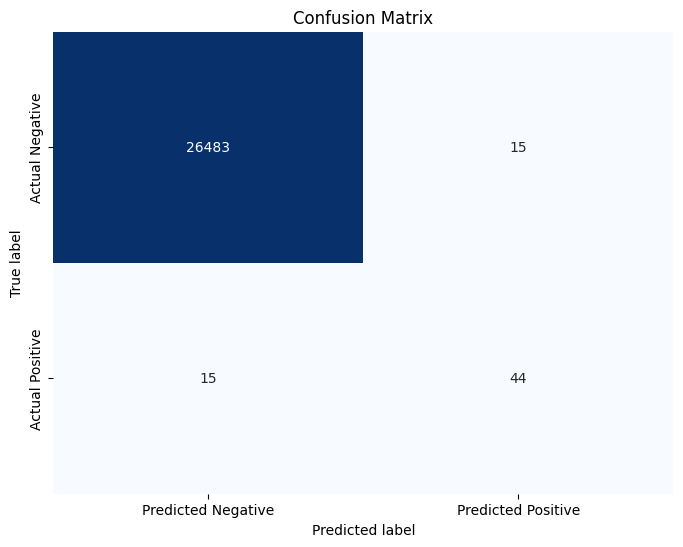

confusion metrics of model with adam optimizer


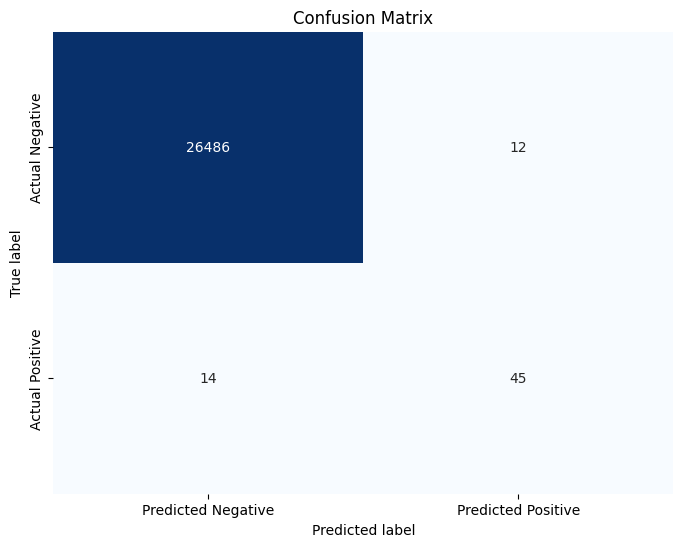

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for rms
conf_matrix_r = confusion_matrix(y_test, class_predictions_r)
print("confusion metrics of model with rms optimizer")
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



# Calculate the confusion matrix for adam
conf_matrix_a = confusion_matrix(y_test, class_predictions_a)

print("confusion metrics of model with adam optimizer")
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_a, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

precision recall curve

precision-recall curve for rms


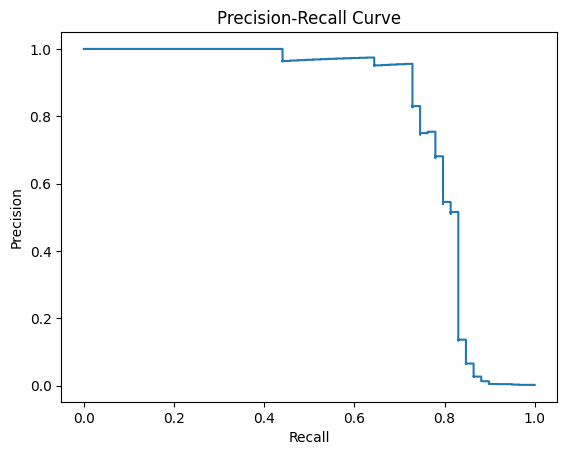

precision-recall curve for adam


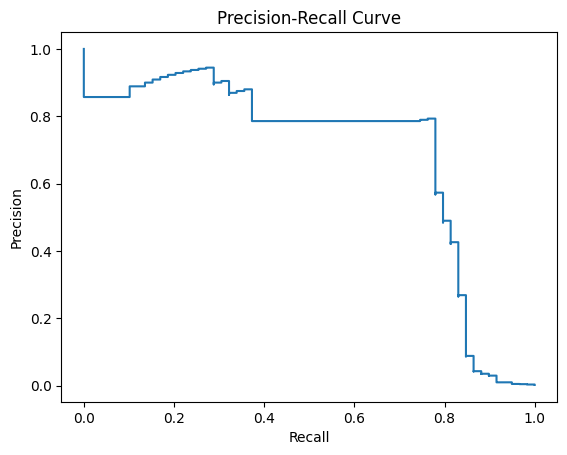

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Calculate precision and recall for rms
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_rms)
print("precision-recall curve for rms")
# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

# Calculate precision and recall for adam
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_adam)
print("precision-recall curve for adam")
# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()